<div style="background-color:#769fcd;color:#FFFFFF;padding:20px;">
<h1>Capstone Project - The Battle of the Neighbourhoods - Week 2</h1><a name="contents"></a>
<h3><em>IBM Data Science Professional Certificate - Alex Lynn</em></h3>
</div>

<h2>Table of Contents</h2>
* [1. Introduction](#introduction)
* [2. Data](#data)
* [3. Methodology](#methods)
* [4. Analysis](#analysis)
* [5. Results](#results)
* [6. Discussion](#discussion)
* [7. Concolusion](#conclusion)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>1. Introduction</h2><a name="introduction"></a>
</div>

This research is intended on finding the best suitable location for a **Peruvian** restaurant in the city of **Cambridge, UK**. The report is designed for any stakeholder who would like to make a calculated risk before leasing a retail space.

The main criteria for this report are to find a location that is close to an area where there is a good choice of entertainment, but where there are not any restaurants that provide similar cuisine type (e.g. **Mexican, Brazilian** etc).

**Cambridge** is a city with a big demographic of tourists and foreign students, so appealing to a type of cuisine that does not exist in the market could prove profitable for the stakeholder.

**Latin American** food is always popular, and **Peruvian** food is surging in global popularity currently with several Peruvian chefs winning coverted culinary prizes in the last few years.

As of current statistics these are the **5** most popular restaurant cuisines in the **UK**, so there is a gap in the market for emerging food trends. The report will look to examine whether Cambridge fits into the same generalised food choice as the rest of the UK.
<ol>
    <li>Pub Food</li>
    <li>English</li>
    <li>Chinese</li>
    <li>Indian</li>
    <li>Italian</li>
</ol>

> <small>Appendix: 1.1</small>
> <a href="https://beambox.com/townsquare/what-are-the-most-popular-types-of-restaurants-in-the-uk">What are the most popular types of restaurants in the UK</a><br>
> <cite>Beambox.com</cite>

[Back to Contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>2. Data</h2><a name="data"></a>
</div>

In this section we will look to get the following data.

**Data Retrieval and Cleansing**

* Scrape the district names into a dataframe using this <a href="https://wiki.openstreetmap.org/wiki/Cambridge">website</a><br>
* Load our GeoJSON file and add the boundary points to our district dataframe.
* Find the centre location of **Cambridge**, this will be used to center our maps.
* Locate any restaurants within the City that already serve **Latin American** food.
    * Restaurant information will be stored for use in further analysis.
    * To ensure less competition for the stakeholder we suggest that there is a **500m radius** from any existing **Latin American** restaurant.
* Search for all restaurants within the city
    * To search we will use the centroid of each of the 14 districts within Cambridge as the latitude and longitude.
    * As the search radius is 1.5km we will end up with duplicate restaurants, remove all duplicate entries.
    * Assign each restaurant into a district using the geojson polygon to see whether the latitude and longitude of a restaurant is situated within the polygon.
* Search for all entertainment and night life spoits within the city
    * To search we will use the centroid of each of the 14 districts within Cambridge as the latitude and longitude.
    * As the search radius is 1.5km we will end up with duplicate venues, remove all duplicate entries.
    * Assign each venue into a district using the geojson polygon to see whether the latitude and longitude of a venue is situated within the polygon.
    
**Data Visualisation**

* Now that we have the data available we should visualise it:
    * Horizontal bar chart to visualise the frequency of restaurants in districts.
    * Choropleth Map to show the most populous districts for restaurants
        * Use circle markers to show restaurants.
        * Add Latin American restaurants, with a circle to show a 500m radius.
    * Choropleth Map to show the most populous districts for entertainment and nightlife spots.
        * Use circle markers to show venues.
      

In this section the methods and libraries used will be:

* *Geolocater* to provide the centre point of **Cambridge, UK**.
* *Web Scraping* of **Cambridge** districts.
    * Data gathered to get the Geo points for each district.
    * Data will be used to create a Choropleth Map depicting the frequencies within these areas.
    > <small>Appendix: 2.1</small>
    > <a href="https://wiki.openstreetmap.org/wiki/Cambridge">Cambridge</a><br>
    > <cite>OpenStreetMap.org</cite>
* *FourSquare API* will return lists of venues using the co-ordinates for each district.
    * It will also return the latitude and longitude for each venue.
    * Using specific venue categories will return the specified data requied.
        * We will be using the **search** api call, as we can use multpile categories in our search api.
* *Pygeodesy* library will be used for it's latitude and longitude functions.
    

[Back to Contents](#contents)

#### Import Statement

<table align="left">
    <thead>
        <th>Library</th>
        <th>Reason</th>
    </thead>
    <tbody>
        <tr>
            <td>**Folium**</td>
            <td>Mapping library, to create accurate map visualisations</td>
        </tr>
        <tr>
            <td>**Pandas**</td>
            <td>Data Analysis library, to create DataFrames and process data.</td>
        </tr>
        <tr>
            <td>**Matplotlib**</td>
            <td>Plotting library, to show visualisations of the data.</td>
        </tr>
        <tr>
            <td>**Seaborn**</td>
            <td>Plotting library, works on top of Matplotlib.</td>
        </tr>
        <tr>
            <td>**urllib.request**</td>
            <td>URL request library, to make web requests.</td>
        </tr>
        <tr>
            <td>**bs4**</td>
            <td>BeautifulSoup library, to scrape the data from web requests.</td>
        </tr>
        <tr>
            <td>**geocoder**</td>
            <td>GeoCoder library, to get the latitude and longitude using an address.</td>
        </tr>
        <tr>
            <td>**Numpy**</td>
            <td>Scientific library, we will be using it for Arrays.</td>
        </tr>
        <tr>
            <td>**JSON**</td>
            <td>JSON library, used to load and parse JSON files.</td>
        </tr>
        <tr>
            <td>**Requests**</td>
            <td>Web Requests library, to access websites and parse HTML</td>
        </tr>
        <tr>
            <td>**Pygeodesy**</td>
            <td>Geo Point library, provides functions for latitude and longitude calculations</td>
        </tr>
        <tr>
            <td>**Scikit-Learn**</td>
            <td>Machine Learning library, provides functions we will use for Clustering and Normalising data</td>
        </tr>
        <tr>
            <td>**Scipy**</td>
            <td>Maths library, provides math algorithms for statistics</td>
    </tbody>
</table>

In [1]:
# Import Statements

# Python data and scientific libraries
import numpy as np
import pandas as pd
# K-Means
from sklearn.cluster import KMeans
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Imports from Math Library
from math import sin, cos, sqrt, atan2, radians, degrees, asin
# K-Elbow
from scipy.spatial.distance import cdist 

# Import PyGeodesy for scientific location libraries
from pygeodesy import Numpy2LatLon, points, simplifyRDP, centroidOf, bearing
from pygeodesy.sphericalNvector import LatLon

# Import from geopy
import geopy
from geopy.distance import geodesic

# Map libraries
import folium
from folium import plugins

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline 

# Web Request and scaping libraries
import urllib.request
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import json
import requests

### Data Retrieval & Cleansing
<a id="dataretrieval"></a>

To start we need to scrape the data from the <a href="https://wiki.openstreetmap.org/wiki/Cambridge">website</a> to get all of our districts which will be used with our .geojson file.<br>
This will be done using `urllib.request` which will request the URL from the site, then we will use `bs4` to collect the information from the request and put it into a DataFrame

In [2]:
# Request the webpage of the following URL
url = 'https://wiki.openstreetmap.org/wiki/Cambridge'
data_raw = urllib.request.urlopen(url).read()

In [3]:
# Prettify the request
soup = BeautifulSoup(data_raw, 'lxml')

##### Get all data from the website into an array

In [4]:
# Initiate the arrays
district = []
location = []

# Get the 4th table from the webpage
tables = soup.findAll("table")[3]

# Get all <tr> references from the table
rows = tables.findAll("tr")

# For each row in <tr>
for row in rows:
    i = 0
    cells = row.findAll("td")
    for cell in cells:
        if i == 0:
            district.append(cell.text)
        elif i == 1:
            number = cell.find("span", title="browse relation").text
            location.append(number)
        
        i = i + 1

##### Combine Arrays into DataFrame

In [5]:
df_district = pd.DataFrame(district,columns=['District'])
df_district['Location'] = location

print('Shape:',df_district.shape)
df_district.head()

Shape: (14, 2)


,District,Location
0,Abbey,1736010
1,Arbury,1736011
2,Castle,1736012
3,Cherry Hinton,1736013
4,Coleridge,1736014


##### Load the GeoJson file

* GeoJson file that made using the location boundary information from the webiste listed above.
* Json data collected from <a href="http://polygons.openstreetmap.fr/">website</a>.
* Json data collated into one GeoJson file using Adobe Dreamweaver and following the standard on
<a href="https://en.wikipedia.org/wiki/GeoJSON">Wikipedia</a>.
* Final geojson file tested using <a href="http://geojson.io/">geojson.io</a>

In [6]:
cambridge_geo = r'cambridge.geojson'

#### -- FUNCTION -- Check if Latitude and Longitude are within Polygon

In [7]:
def add_polygon_cluster():
    
    with open(cambridge_geo) as f:
        data = json.load(f)
        coll = data['features']
        
        name = []
        geo = []
        
        # Loop through the json file
        for row in coll:
                        
            # setup properties node
            prop = row['properties']
            
            # setup coordinates node
            geometry = row['geometry']
            geo.append(geometry['coordinates'])
            
            #print(coord)
            
            # loop through the key, value pairs in properties
            for key, value in prop.items():
                name.append(value)
                
    global df_polygon
    df_polygon = pd.DataFrame(name, columns = ['District'])
    df_polygon['Geo'] = geo

In [8]:
add_polygon_cluster()
df_polygon

,District,Geo
0,Arbury,"[[[[0.1034775, 52.2280993], [0.1072318, 52.226..."
1,Abbey,"[[[[0.1367517, 52.2110342], [0.1373021, 52.209..."
2,Castle,"[[[[0.0686399, 52.2149333], [0.0686389, 52.216..."
3,Cherry Hinton,"[[[[0.1593948, 52.1842636], [0.1593446, 52.184..."
4,Coleridge,"[[[[0.1326076, 52.1869821], [0.1334492, 52.188..."
5,East Chesterton,"[[[[0.1367517, 52.2110342], [0.136557, 52.2117..."
6,Kings Hedges,"[[[[0.1187119, 52.2313202], [0.1191612, 52.231..."
7,Market,"[[[[0.1176897, 52.2051572], [0.1175749, 52.204..."
8,Newnham,"[[[[0.071117, 52.2151264], [0.0733881, 52.2150..."
9,Petersfield,"[[[[0.1295975, 52.2009518], [0.1303136, 52.200..."


#### -- FUNCTION -- Returns Boundary Latitude and Longitude arrays

In [9]:
def returnBoundary(latlon):

    Lat = []
    Lon = []
        
    # loop through the coordinates
    for level1 in latlon:
        for level2 in level1:
            for level3 in level2:
                    
                # convert to string
                i = str(level3)
                
                # replace brackets
                i = i.replace('[','')
                i = i.replace(']','')
                i = i.strip()
                    
                # split using the space, with maximum of two values in list
                i = i.split(' ',1)
                                
                # add latitude and longitude to respective arrays
                Lat.append(float(i[1]))
                Lon.append(float(i[0]))
                

    # print(Lat[:5])
    
    return Lat, Lon

#### -- FUNCTION -- Returns Boolean whether a Latitude or Longitude are located within the Polygon Boundary

In [10]:
def return_latlon(llat,llon,lat,lon):
             
    p = LatLon(float(lat),float(lon))
      
    llat = np.array(llat)
    llat.ndim
    #print(llat.shape)
    llon = np.array(llon)
    llon.ndim
    #print(llon.shape)
    
    combined = np.vstack((llat, llon)).T
    #print(combined,'Shape: ',combined.shape)
    
    points = Numpy2LatLon(combined)
    #print(p)
    
    toRet = LatLon.isEnclosedBy(p,points)  
    
    return toRet
    

#### Create arrays for all districts with all the geopoints for Latitude and Longitude listed

This will be used to locate the district in which a restaurant of entertainment venue is listed in.

In [11]:
def create_arrays_districts():
    
    bound_lat = []
    bound_lon = []
    
    for ind,v in df_polygon.iterrows(): 
        v_geo = v['Geo']
        v_lat, v_lon = returnBoundary(np.array(v_geo))
        bound_lat.append(v_lat)
        bound_lon.append(v_lon) 

    df_polygon['g_lat'] = bound_lat
    df_polygon['g_lon'] = bound_lon

In [12]:
create_arrays_districts()
df_polygon.head()

,District,Geo,g_lat,g_lon
0,Arbury,"[[[[0.1034775, 52.2280993], [0.1072318, 52.226...","[52.2280993, 52.2265154, 52.2256128, 52.225194...","[0.1034775, 0.1072318, 0.110444, 0.1118966, 0...."
1,Abbey,"[[[[0.1367517, 52.2110342], [0.1373021, 52.209...","[52.2110342, 52.2092654, 52.2088514, 52.208639...","[0.1367517, 0.1373021, 0.1374754, 0.1376028, 0..."
2,Castle,"[[[[0.0686399, 52.2149333], [0.0686389, 52.216...","[52.2149333, 52.2161086, 52.216112, 52.2162768...","[0.0686399, 0.0686389, 0.0686507, 0.0702233, 0..."
3,Cherry Hinton,"[[[[0.1593948, 52.1842636], [0.1593446, 52.184...","[52.1842636, 52.1842037, 52.1840772, 52.184161...","[0.1593948, 0.1593446, 0.1602601, 0.1603329, 0..."
4,Coleridge,"[[[[0.1326076, 52.1869821], [0.1334492, 52.188...","[52.1869821, 52.1883058, 52.1906089, 52.193518...","[0.1326076, 0.1334492, 0.1350314, 0.1371856, 0..."


#### -- FUNCTION -- Get Centroid of Polygon

In [13]:
def return_centroid(llat,llon):
    
    #p = LatLon(float(lat),float(lon))
      
    llat = np.array(llat)
    llat.ndim
    #print(llat.shape)
    llon = np.array(llon)
    llon.ndim
    #print(llon.shape)
    
    combined = np.vstack((llat, llon)).T
    #print(combined,'Shape: ',combined.shape)
    
    points = Numpy2LatLon(combined)
    #print(p)
    
    toRet = centroidOf(points)  
    
    return toRet
    

#### Get the centroid for each district

We will call the function created earlier called *return_centroid* and the centroid lat & lon will be used later to search for venues within this area.

In [14]:
def create_districts_centroid():
    
    cen_lat = []
    cen_lon = []
    
    for ind,v in df_polygon.iterrows(): 
        v_glat = v['g_lat']
        v_glon = v['g_lon']
        v_tuple = return_centroid(v_glat,v_glon)
        cen_lat.append(v_tuple[0])
        cen_lon.append(v_tuple[1]) 

    # Add Lat and Lon to df_polygon
    df_polygon['Lat'] = cen_lat
    df_polygon['Lon'] = cen_lon

In [15]:
create_districts_centroid()

# Display the head of the dataframe
df_polygon.head()

,District,Geo,g_lat,g_lon,Lat,Lon
0,Arbury,"[[[[0.1034775, 52.2280993], [0.1072318, 52.226...","[52.2280993, 52.2265154, 52.2256128, 52.225194...","[0.1034775, 0.1072318, 0.110444, 0.1118966, 0....",52.222864,0.115997
1,Abbey,"[[[[0.1367517, 52.2110342], [0.1373021, 52.209...","[52.2110342, 52.2092654, 52.2088514, 52.208639...","[0.1367517, 0.1373021, 0.1374754, 0.1376028, 0...",52.209615,0.160483
2,Castle,"[[[[0.0686399, 52.2149333], [0.0686389, 52.216...","[52.2149333, 52.2161086, 52.216112, 52.2162768...","[0.0686399, 0.0686389, 0.0686507, 0.0702233, 0...",52.216704,0.099645
3,Cherry Hinton,"[[[[0.1593948, 52.1842636], [0.1593446, 52.184...","[52.1842636, 52.1842037, 52.1840772, 52.184161...","[0.1593948, 0.1593446, 0.1602601, 0.1603329, 0...",52.185071,0.172995
4,Coleridge,"[[[[0.1326076, 52.1869821], [0.1334492, 52.188...","[52.1869821, 52.1883058, 52.1906089, 52.193518...","[0.1326076, 0.1334492, 0.1350314, 0.1371856, 0...",52.190885,0.151102


#### -- FUNCTION -- Return District name of venue

In [16]:
def return_districtName(lat,lon):
    
    for ind,v in df_polygon.iterrows(): 
        v_lat = v['g_lat']
        v_lon = v['g_lon']
        v_name = v['District']
        
        #print('Name: ',v_name,'Lat',v_lat,'Lon',v_lon)
        
        if return_latlon(v_lat,v_lon,lat,lon) == True:
            return v_name
    
    return 'None'

#### Setup FourSquare Settings 

These have been removed for the final workbook, replaced by 'X'

In [17]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

VERSION = '20200729' # Foursquare API version

#### -- FUNCTION -- FourSquare Return

* Using a **search** call on the API so that I can use multiple categories.
* Function takes in the following paramaters:
    * Names (Array)
    * Latitudes (Array)
    * Lonitudes (Array)
    * Radius (in metres) - <em>Default 500</em>
    * Limit - <em>Default 100</em>
    * Category - <em>Default ''</em>
* <strong>Returns DataFrame</strong>

In [18]:
def getNearbyVenues(latitudes, longitudes,radius,category=''):    
    
    '''
    Use this function to return a dataframe with all the venues within your criteria.
    RETURNS:
        DataFrame with [District],[Venue],[Venue Latitude],[Venue Longitude],[Venue Category]
    '''
    
    venue_ =[]
    lat_ = []
    lon_ = []
    cat_ = []

    for lat, lng in zip(latitudes, longitudes):
            
        # create the API request URL
        
        url = ''
        if category == '':
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng,radius)
        else:
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng,radius, category)
         
        # &limit={} LIMIT
            
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng,radius, category)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        #print(results)
        
        # return only relevant information for each nearby venue
        for v in results:
            name = v['name']
            lat = v['location']['lat']
            lon = v['location']['lng']
            cat = ''
            
            c_len = len(v['categories'])
            #print(c_len)
            if c_len > 0:
                   cat = v['categories'][0]['name']
            else:
                   cat = 'None'
            
            venue_.append(name)
            lat_.append(lat)
            lon_.append(lon)
            cat_.append(cat)
            
        
    nearby_venues = pd.DataFrame(data=venue_, columns=['Venue'])
    nearby_venues['Venue Latitude'] = lat_
    nearby_venues['Venue Longitude'] = lon_
    nearby_venues['Venue Category'] = cat_
            
    return nearby_venues

##### Latitude and Longitude of Cambridge using geolocation

This is used to get the location of Cambridge, UK so that we can center our map.

In [19]:
city_name = 'Cambridge, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
city_location = geolocator.geocode(city_name)
city_latitude = city_location.latitude
city_longitude = city_location.longitude
print('Cambridge, UK Coordinates: {}, {}.'.format(city_latitude, city_longitude))

Cambridge, UK Coordinates: 52.2034823, 0.1235817.


#### Show map of Cambridge with districts

* Map shows markers using district latitude and longitude
* Radius is drawn to show the search area that we will be using in Foursquare
    * We will be using 1.5km search radius to make sure that we get all venues from these districts
* There is a limit on the amount of results that you can retrieve from a search, so we will be looping through the districts to ensure that we have as many venues as possible.
* Once we have the dataframe of restaurants we will:
    * Put restaurants into a district, using a function which will use the latitutde and longitude to see whether a location is within a polygon (obtained from the geojson).
    * Delete duplicate restaurants, as due to the overlap of search areas there may be several duplicates.

In [20]:
# create a map centered on Cambridge
cambridge_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=12,control_scale=True)

In [21]:
# Function loop through districts and add marker using lat and lon
def addMarkers(m):

    for lat, lng, name in zip(df_polygon.Lat, df_polygon.Lon, df_polygon.District):
        location = np.array([lat,lng])
        # Add Marker
        folium.Marker(location, popup='<i>{}</i>'.format(name), tooltip=name).add_to(m)
        # Add Radius of 500m
        folium.Circle(
            location=location,
            radius=1500,
            color='#3186cc',
            fill=True,
            fill_color='#3186cc'
        ).add_to(m)
    
    display(m)

In [22]:
addMarkers(cambridge_map)

Looking at the search radius we can see that we will be searching through all of the relevant districts.

##### FourSquare Categories

These are the categories that we will be using to get our data.

**4d4b7105d754a06374d81259** - Restaurants<br>
**4d4b7105d754a06376d81259, 4d4b7104d754a06370d81259** - Entertainment & Nightlife<br>
**4bf58dd8d48988d1be941735** - Latin American restaurants

In [23]:
fs_venue = '4d4b7105d754a06374d81259'
fs_entertain = '4d4b7105d754a06376d81259,4d4b7104d754a06370d81259'
fs_latin = '4bf58dd8d48988d1be941735'
fs_other = '4d4b7105d754a06372d81259,4d4b7105d754a06377d81259,4d4b7105d754a06375d81259,4e67e38e036454776db1fb3a,4d4b7105d754a06378d81259,4d4b7105d754a06379d81259'

# Radius variable
fs_r = 1500

### Retrieve all venues with no filter of categories

This dataframe will be used for K-Mean clustering. We need to include all venues so that we can create a clear picture of the district.

In [24]:
# Get all venues, looping through districts
df_total_venues = getNearbyVenues(df_polygon['Lat'], df_polygon['Lon'],fs_r,fs_other)
print(df_total_venues.shape)
df_total_venues.head()

(405, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aldi,52.219485,0.111355,Supermarket
1,Scudamore's Quayside Punting Station,52.209822,0.116740,Harbor / Marina
2,BP,52.213301,0.136789,Gas Station
3,Midsummer Common,52.208281,0.130340,Field
4,Jesus Green,52.211962,0.120284,Park


In [25]:
''# Sort by Venue
df_total_venues.sort_values("Venue", inplace=True)

# Drop duplicated
df_total_venues.drop_duplicates(keep='first',inplace=True) 

# Drop any venue with 'none' or 'None' as category
df_total_venues.drop(df_total_venues.loc[df_total_venues['Venue Category']=='None'].index, inplace=True)
df_total_venues.drop(df_total_venues.loc[df_total_venues['Venue Category']=='none'].index, inplace=True)

print(df_total_venues.shape)
df_total_venues.head()

(194, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
107,ARM Staff Gym,52.181794,0.179164,Gym
137,Aberdeen Square,52.190158,0.128621,Housing Development
374,Abode development,52.168582,0.120485,Housing Development
289,Addenbrooke's Hospital,52.175162,0.140665,Hospital
288,Addenbrooke's Hospital Bus Station,52.175910,0.145007,Bus Station


From this search we can see that we have retrieved **196** venues from our search of districts with a 1.5 km search radius.

Now we will assign districts to the venues, before removing any district with 'none'.

In [26]:
v_dist = []

for ind,v in df_total_venues.iterrows(): 
    v_lat = v['Venue Latitude']
    v_lon = v['Venue Longitude']
    v_dist.append(return_districtName(v_lat,v_lon))

In [27]:
df_total_venues['District'] = v_dist

In [28]:
df_total_venues.drop(df_total_venues.loc[df_total_venues['District']=='None'].index, inplace=True)
print(df_total_venues.shape)
df_total_venues.head()

(175, 5)


,Venue,Venue Latitude,Venue Longitude,Venue Category,District
107,ARM Staff Gym,52.181794,0.179164,Gym,Cherry Hinton
137,Aberdeen Square,52.190158,0.128621,Housing Development,Trumpington
374,Abode development,52.168582,0.120485,Housing Development,Trumpington
289,Addenbrooke's Hospital,52.175162,0.140665,Hospital,Queen Ediths
288,Addenbrooke's Hospital Bus Station,52.175910,0.145007,Bus Station,Queen Ediths


We are left with **175** venues which are not in the food, entertainment or nightlife categories.

### Retrieve all restaurants

In [29]:
# Get Restaurants, looping through districts
df_total_restaurants = getNearbyVenues(df_polygon['Lat'], df_polygon['Lon'],fs_r,fs_venue)
print(df_total_restaurants.shape)
df_total_restaurants.head()

(401, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Coffee Tree,52.219494,0.111630,Café
1,Midsummer House,52.212125,0.128360,Restaurant
2,Bould Brothers Coffee,52.208555,0.118677,Coffee Shop
3,Patisserie Valerie,52.207795,0.119545,Café
4,Las Iguanas,52.210230,0.117309,Latin American Restaurant


From this search we can see that we have retrieved **401** restaurants from our search of districts with a 1.5 km search radius.

Now lets delete all of the duplicate rows.

In [30]:
df_total_restaurants.sort_values("Venue", inplace=True)
df_total_restaurants.drop_duplicates(keep='first',inplace=True) 
print(df_total_restaurants.shape)
df_total_restaurants.head()

(193, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
149,121,52.220016,0.133151,Café
118,Al Pomodoro,52.189030,0.134581,Pizza Place
353,Ali Baba's,52.195229,0.131154,Middle Eastern Restaurant
36,Ali's Kebab Van,52.207177,0.141305,Food Truck
399,Aromi,52.206681,0.130723,Coffee Shop


After removing duplicates, we are left with **193** restaurants.

Next we will assign a district to each restaurant, using our geojson file data, and remove any restaurants that do not have a district.

In [31]:
v_dist = []

for ind,v in df_total_restaurants.iterrows(): 
    v_lat = v['Venue Latitude']
    v_lon = v['Venue Longitude']
    v_dist.append(return_districtName(v_lat,v_lon))

print('Array: ',v_dist[:5],'Length: ',len(v_dist))

Array:  ['West Chesterton', 'Coleridge', 'Petersfield', 'Petersfield', 'Market'] Length:  193


Join the list with the DataFrame

In [32]:
df_total_restaurants['District'] = v_dist
df_total_restaurants.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,District
149,121,52.220016,0.133151,Café,West Chesterton
118,Al Pomodoro,52.189030,0.134581,Pizza Place,Coleridge
353,Ali Baba's,52.195229,0.131154,Middle Eastern Restaurant,Petersfield
36,Ali's Kebab Van,52.207177,0.141305,Food Truck,Petersfield
399,Aromi,52.206681,0.130723,Coffee Shop,Market


Remove any restaurants where the value is 'none'

In [33]:
df_total_restaurants.drop(df_total_restaurants.loc[df_total_restaurants['District']=='None'].index, inplace=True)
print(df_total_restaurants.shape)
df_total_restaurants.head()

(182, 5)


,Venue,Venue Latitude,Venue Longitude,Venue Category,District
149,121,52.220016,0.133151,Café,West Chesterton
118,Al Pomodoro,52.189030,0.134581,Pizza Place,Coleridge
353,Ali Baba's,52.195229,0.131154,Middle Eastern Restaurant,Petersfield
36,Ali's Kebab Van,52.207177,0.141305,Food Truck,Petersfield
399,Aromi,52.206681,0.130723,Coffee Shop,Market


Now we are left with a list of **182** restaurants from our 14 districts.

### Retrieve all Entertainment venues

We will now do the same for the entertainment venues as we did for restaurants.

In [34]:
# Get Restaurants, looping through districts
df_total_entertain = getNearbyVenues(df_polygon['Lat'], df_polygon['Lon'],fs_r,fs_entertain)
print(df_total_entertain.shape)
df_total_entertain.head()

(374, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carpenters Arms,52.215706,0.114202,Pub
1,Rutherford's Punting Company,52.211673,0.118366,Tour Provider
2,The Pickerel Inn,52.209942,0.116296,Pub
3,The Boathouse,52.213757,0.123532,Pub
4,The Baron Of Beef,52.208881,0.118087,Pub


From this search we can see that we have retrieved **374** entertainment venues from our search of districts with a 1.5 km search radius.

Now lets delete all of the duplicate rows.

In [35]:
df_total_entertain.sort_values("Venue", inplace=True)
df_total_entertain.drop_duplicates(keep='first',inplace=True) 
print(df_total_entertain.shape)
df_total_entertain.head()

(160, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
103,196 Mill Road,52.197752,0.144226,Bar
12,5tudio Five,52.207256,0.122187,Art Gallery
25,ADC Theatre,52.208525,0.120008,Theater
322,Alladin,52.195271,0.131506,Hookah Bar
152,Arbury Carnival,52.222245,0.132528,Arts & Entertainment


After removing duplicates, we are left with **160** entertainment venues.

Next we will assign a district to each venue, using our geojson file data, and remove any venues that do not have a district.

In [36]:
v_dist = []

for ind,v in df_total_entertain.iterrows(): 
    v_lat = v['Venue Latitude']
    v_lon = v['Venue Longitude']
    v_dist.append(return_districtName(v_lat,v_lon))

print('Array: ',v_dist[:5],'Length: ',len(v_dist))

Array:  ['Romsey', 'Market', 'Market', 'Petersfield', 'West Chesterton'] Length:  160


Join the list with the DataFrame

In [37]:
df_total_entertain['District'] = v_dist
df_total_entertain.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,District
103,196 Mill Road,52.197752,0.144226,Bar,Romsey
12,5tudio Five,52.207256,0.122187,Art Gallery,Market
25,ADC Theatre,52.208525,0.120008,Theater,Market
322,Alladin,52.195271,0.131506,Hookah Bar,Petersfield
152,Arbury Carnival,52.222245,0.132528,Arts & Entertainment,West Chesterton


Remove any venues where the value is 'none'

In [38]:
df_total_entertain.drop(df_total_entertain.loc[df_total_entertain['District']=='None'].index, inplace=True)
print(df_total_entertain.shape)
df_total_entertain.head()

(153, 5)


,Venue,Venue Latitude,Venue Longitude,Venue Category,District
103,196 Mill Road,52.197752,0.144226,Bar,Romsey
12,5tudio Five,52.207256,0.122187,Art Gallery,Market
25,ADC Theatre,52.208525,0.120008,Theater,Market
322,Alladin,52.195271,0.131506,Hookah Bar,Petersfield
152,Arbury Carnival,52.222245,0.132528,Arts & Entertainment,West Chesterton


Now we are left with a list of **153** venues from our 14 districts.

### Retrieve all Latin American Restaurants

Lastly we need to retrieve the Latin American Restaurants

In [39]:
# Get Latin American restaurants, looping through districts
df_total_latin = getNearbyVenues(df_polygon['Lat'], df_polygon['Lon'],fs_r,fs_latin)
print(df_total_latin.shape)
df_total_latin.head()

(26, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Las Iguanas,52.210230,0.117309,Latin American Restaurant
1,La Latina Bustaurante,52.208076,0.143403,Latin American Restaurant
2,Chicken rush,52.197636,0.144912,Arepa Restaurant
3,Hutter,52.209328,0.144877,South American Restaurant
4,Las Iguanas,52.210230,0.117309,Latin American Restaurant


From this search we can see that we have retrieved **26** Latin American restaurants from our search of districts with a 1.5 km search radius.

Now lets delete all of the duplicate rows.

In [40]:
df_total_latin.sort_values("Venue", inplace=True)
df_total_latin.drop_duplicates(keep='first',inplace=True) 
print(df_total_latin.shape)
df_total_latin.head()

(5, 4)


,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Chicken rush,52.197636,0.144912,Arepa Restaurant
12,Hutter,52.209328,0.144877,South American Restaurant
11,La Latina Bustaurante,52.208076,0.143403,Latin American Restaurant
9,Las Iguanas,52.210230,0.117309,Latin American Restaurant
6,Neide's Deli Café,52.200508,0.135943,Brazilian Restaurant


After removing duplicates, we are left with **5** Latin American restaurants.

Next we will assign a district to each venue, using our geojson file data, and remove any venues that do not have a district.

In [41]:
v_dist = []

for ind,v in df_total_latin.iterrows(): 
    v_lat = v['Venue Latitude']
    v_lon = v['Venue Longitude']
    v_dist.append(return_districtName(v_lat,v_lon))

print('Array: ',v_dist[:5],'Length: ',len(v_dist))

Array:  ['Romsey', 'Abbey', 'Abbey', 'Market', 'Petersfield'] Length:  5


Join the list with the DataFrame

In [42]:
df_total_latin['District'] = v_dist
df_total_latin.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,District
2,Chicken rush,52.197636,0.144912,Arepa Restaurant,Romsey
12,Hutter,52.209328,0.144877,South American Restaurant,Abbey
11,La Latina Bustaurante,52.208076,0.143403,Latin American Restaurant,Abbey
9,Las Iguanas,52.210230,0.117309,Latin American Restaurant,Market
6,Neide's Deli Café,52.200508,0.135943,Brazilian Restaurant,Petersfield


Remove any venues where the value is 'none'

In [43]:
df_total_latin.drop(df_total_latin.loc[df_total_latin['District']=='None'].index, inplace=True)
print(df_total_latin.shape)
df_total_latin.head()

(5, 5)


,Venue,Venue Latitude,Venue Longitude,Venue Category,District
2,Chicken rush,52.197636,0.144912,Arepa Restaurant,Romsey
12,Hutter,52.209328,0.144877,South American Restaurant,Abbey
11,La Latina Bustaurante,52.208076,0.143403,Latin American Restaurant,Abbey
9,Las Iguanas,52.210230,0.117309,Latin American Restaurant,Market
6,Neide's Deli Café,52.200508,0.135943,Brazilian Restaurant,Petersfield


Now we are left with a list of **5** Latin American restaurants from our 14 districts.

[Back to Contents](#contents)

### Data Visualisation
<a id="datavisual"></a>

#### Bar Chart showing the frequency of restaurants within districts

* Create a new horizontal bar plot with the districts and the frequency of restaurants

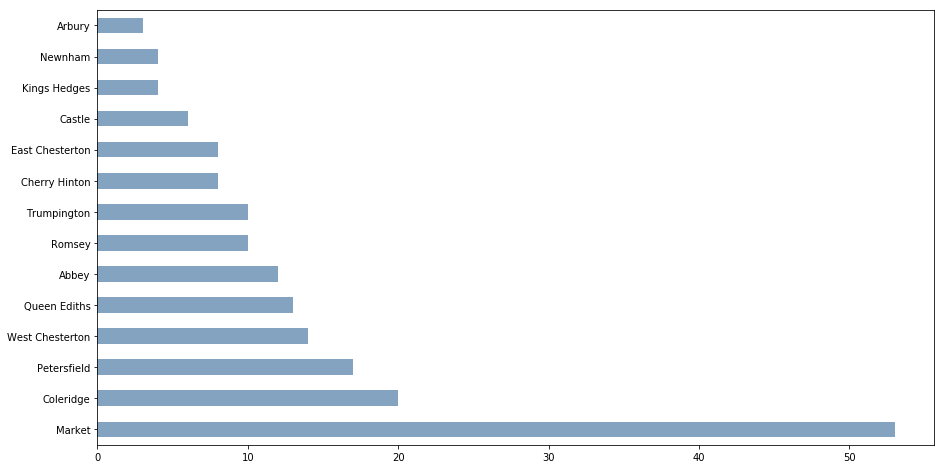

In [44]:
df_total_restaurants['District'].value_counts().plot(kind='barh', figsize=(15,8), color=(0.2, 0.4, 0.6, 0.6))
plt.savefig('District_Rest.svg', Bbox='tight')

**From this bar plot we can see that the most populous areas for restaurants are Petersfield, Coleridge and Market.**

#### Details Map

Let's a make a map to display the following:
* Chloropeth Map showing the frequency of restaurants in the districts.
* Markers display venue location to show density within districts

In [45]:
# Create a DataFrame to hold the district names and count
district_count = pd.DataFrame(df_total_restaurants['District'].value_counts())
district_count.reset_index(inplace=True)
district_count.columns = ['District','Count']
district_count.head()

,District,Count
0,Market,53
1,Coleridge,20
2,Petersfield,17
3,West Chesterton,14
4,Queen Ediths,13


### Map Functions

Let's create some map functions that will help us re-use the data later.

#### -- FUNCTION -- Add Circle Markers to Map

In [46]:
def add_circle_markers(m,df,col):
    # create a feature group
    fg = folium.map.FeatureGroup()

    # loop through the restaurants and add each to the restaurants feature group
    for lat, lng, in zip(df['Venue Latitude'],df['Venue Longitude']):
        fg.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=1, # define how big you want the circle markers to be
                color=col,
                fill=True,
                fill_color=col,
                fill_opacity=0.6
            )
        )
    
    # add feature group to map
    m.add_child(fg)
    print('** Circle Markers Added')

#### -- FUNCTION -- Add Text labels to Map

In [47]:
def add_text_labels(m,df):
    # Add titles to the districts
    for ind,v in df.iterrows(): 
        v_lat = v['Lat']
        v_lon = v['Lon']
        v_name = v['District']
        folium.Marker(location=[v_lat,v_lon],
                  icon=folium.DivIcon(html=f"""<div style="background-color: rgba(255, 0, 0, 0.2);; padding: 2px; display: inline-block; font-family: arial; font-size:12px; font-weight:200; color:#FFFFFF">{(v_name)}</div>""")
                 ).add_to(m)
    print('** Text Added')

#### -- FUNCTION -- Add Markers to Map

In [48]:
def add_markers(m,df,tool,mark_col):
    for lat, lng, label, district in zip(df['Venue Latitude'], df['Venue Longitude'],df['Venue'],df['District']):
        location = np.array([lat,lng])
        # Add Marker
        folium.Marker(location, popup='<i>{}</i><br>{}'.format(label,district), tooltip=tool, icon=folium.Icon(color=mark_col)).add_to(m)
    print('** Markers Added')

#### -- FUNCTION -- Add Circle (Radius) to map

In [49]:
def add_circle(m,df,r,cir_col):
    for lat, lng, label, in zip(df['Venue Latitude'], df['Venue Longitude'],df['Venue']):
        location = np.array([lat,lng])
        # Add Radius Circle
        folium.Circle(
                location=location,
                radius=r,
                color=cir_col,
                fill=True,
                fill_color=cir_col
            ).add_to(m)
    print('** Circles Added')

#### -- FUNCTION -- Create A Choropleth Map

In [50]:
def add_choropleth(m,geo,df,columns,bins,legend,col):
    # Add Choropleth Map
    folium.Choropleth(
        geo_data=geo,
        name='choropleth',
        data=df,
        columns=columns,
        key_on='feature.properties.Name',
        fill_color=col,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend,
        bins = bins,
        highlight = True
    ).add_to(m)
    print('** Choropleth Added')

### Create Map of Restaurant Frequency - Choropleth and Markers

In [51]:
cambridge_geo = r'Cambridge.geojson' # geojson file

# Initiate a map
cambridge_ch_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

bins = list(district_count['Count'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1]))
columns = ['District','Count']
legend = 'Restaurant Frequency in Cambridge Districts'

# Add Choropleth, Circle Markers, Text Labels
add_choropleth(cambridge_ch_map,cambridge_geo,district_count,columns,bins,legend,'YlOrRd')
add_circle_markers(cambridge_ch_map,df_total_restaurants,'Yellow')
add_text_labels(cambridge_ch_map,df_polygon)

# Add layer control on the map
folium.LayerControl().add_to(cambridge_ch_map)
    
display(cambridge_ch_map)

** Choropleth Added
** Circle Markers Added
** Text Added


From this Choropleth Map we can distinguish that the central areas of Cambridge contain the most restaurants, with Market and Coleridge containing the greatest frequency.
* *Choropleth and markers can be turned on an off using the layer control in the top right.*

#### Adding existing Latin American restaurants

* Show the current Latin American Restaurants, with a 500m radius.
    * This is the zone where we will not suggest placing the new restaurant.

##### Create Map

In [52]:
# radius
c_r = 500

add_circle(cambridge_ch_map,df_total_latin,c_r,'#ff7d7d')
#add_circle_markers(cambridge_ch_map,df_total_latin,'Red')
add_markers(cambridge_ch_map,df_total_latin,'Latin American Restaurant','red')
display(cambridge_ch_map)

** Circles Added
** Markers Added


From the map we can see that the five existing Latin American restaurants are located in **Petersfield, Romsey, Market and Abbey**.

### Add Entertainment Venues to Map

For this map we will change the choropleth mapping to the entertainment venues.

In [53]:
# Create a DataFrame to hold the district names and count
district_e_count = pd.DataFrame(df_total_entertain['District'].value_counts())
district_e_count.reset_index(inplace=True)
district_e_count.columns = ['District','Count']
district_e_count.head()

,District,Count
0,Market,40
1,Petersfield,19
2,Coleridge,17
3,West Chesterton,15
4,Romsey,11


In [54]:
# Initiate a map
cambridge_ch_tot_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

bins = list(district_e_count['Count'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1]))
columns = ['District','Count']
legend = 'Entertainment Frequency in Cambridge Districts'

# Add Choropleth, Circle Markers, Text Labels
add_choropleth(cambridge_ch_tot_map,cambridge_geo,district_e_count,columns,bins,legend,'BuPu')
add_circle_markers(cambridge_ch_tot_map,df_total_restaurants,'Yellow')
add_circle_markers(cambridge_ch_tot_map,df_total_entertain,'Blue')
add_text_labels(cambridge_ch_tot_map,df_polygon)

# Add layer control on the map
folium.LayerControl().add_to(cambridge_ch_tot_map)
    
display(cambridge_ch_tot_map)

** Choropleth Added
** Circle Markers Added
** Circle Markers Added
** Text Added


In this map we can see the entertainment venues have been added in blue.
Also, from the Choropleth Map we can see that the main districts are dense in entertainment venues, similar to the restaurants. There are some districts, like Castle are denser in entertainment compared to restaurant venues.

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>3. Methodology</h2><a name="methods"></a>
</div>

Now that we have gathered the data from scraping, and from our geojson file we can start to analyise the results.<br>Data gathered in the **Data</a>** section includes:
* Districts
* Centroid locations for Districts
* DataFrame for **All Venues** within each District
* DataFrame for **Restaurants** within each District
* DataFrame for **Entertainment** within each District
* DataFrame for **Latin American** restaurants within each District

We also visualised that data retrieved in the form of Choropleth Maps, and then added circle markers to the maps so we could see if there are any obvious clusters.

Our **goal** is to find the a suitable location for a new restaurant in a location where there are **no Latin American restaurants** and a **populous nightlife**.

In the **analysis** section we will use the following methods:
* **Show** that Cambridge fits into the same popular restaurant types as the rest of the UK.
* **Clustering** using **K-Means** our districts using the data we have for all venues within each district. This will help us to find the most populous districts for entertainment, we will then use this cluster to find appropriate locations.
* **Scatter Plot** using to show the correlation between restaurant and entertainment venues.
* **DBSCAN Clustering** will be used to find clusters in entertainment venues within a district.

The final product of the research will be to provide an address for each of the districts within the most populous entertainment cluster. The address will be located in the centroid position of the most populous entertainment cluster for each district, and not within **500m** of a competing **Latin American** restaurant.

[Back to Contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>4. Analysis</h2><a name="analysis"></a>
</div>

<p>In this section we hope to use our analysis to show suitable locations for the **Peruvian Restaurant**.</p>
<p>To start we will confirm that **Cambridge** does follow the normal trend in most popular restaurants compared to the **UK**.</p>
<p>Then we will cluster the districts into similar clusters using **K-Means**.<p>
<p>After that we will see if there is a **correlation** between the frequency of restaurants and entertainment venues.</p>
<p>Following on from that using **DBSCAN** we will find the cluster with the densest entertainment venues within the k-means cluster that we have chosen to look into. This will be used later to find the ideal location for the restaurant. The clustering will use the **Latitude and Longitude** of the entertainment venues<p>
<p>Lastly the final anaylsis will be to find the ideal locations, we will get the mean of the most popular clusters from the **DBSCAN** step. This will get us a centralised latitude and longitude for the cluster, then we will need to confirm that this is not within a **1km** radius of any other **Latin American** restaurant.</p>

## Does Cambridge follow the same food popularity that the rest of the UK does?

As of current statistics these are the **5** most popular restaurant cuisines in the **UK**
<ol>
    <li>Pub Food</li>
    <li>English</li>
    <li>Chinese</li>
    <li>Indian</li>
    <li>Italian</li>
</ol>

> <small>Appendix: 1.1</small>
> <a href="https://beambox.com/townsquare/what-are-the-most-popular-types-of-restaurants-in-the-uk">What are the most popular types of restaurants in the UK</a><br>
> <cite>Beambox.com</cite>

In [55]:
print('There are {} uniques restaurant categories in Cambridge.'.format(len(df_total_restaurants['Venue Category'].unique())))

There are 47 uniques restaurant categories in Cambridge.


In [56]:
venue_check = df_total_restaurants.groupby('Venue Category').count()
venue_check.drop(columns=['Venue','Venue Latitude','Venue Longitude'],inplace=True)
venue_check.reset_index(inplace=True)
venue_check.columns = ['Category','Count']
venue_check.sort_values(by='Count', ascending=False).head(10)

,Category,Count
11,Café,30
14,Coffee Shop,21
13,Chinese Restaurant,14
27,Indian Restaurant,10
22,Food Truck,8
19,Fast Food Restaurant,8
4,Bakery,7
24,Gastropub,7
34,Pizza Place,6
37,Restaurant,6


Looking at the results of the above table, if we were to remove the following from the list:
* Café
* Coffee Shop
* Bakery

As the above list are technically not restaurants, we can remove these.

We can see that the the order of the **UK top 5** in Cambridge would be:
1. Chinese
1. Indian
1. Gastropub
1. Italian

Using Foursquare and adding the category for food has not included pubs into the equation. Most pubs serve some form of food and are listed as the number one in the UK.

Lets add the entertainment and night spots dataframe to the venue dataframe and recalculate.

In [57]:
# Add Venues and Entertainment
frames = [df_total_restaurants, df_total_entertain]
df_Combine = pd.concat(frames)

venue_check = df_Combine.groupby('Venue Category').count()
venue_check.drop(columns=['Venue','Venue Latitude','Venue Longitude'],inplace=True)
venue_check.reset_index(inplace=True)
venue_check.columns = ['Category','Count']
venue_check.sort_values(by='Count', ascending=False).head(20)

,Category,Count
63,Pub,57
17,Café,30
8,Bar,22
21,Coffee Shop,21
19,Chinese Restaurant,15
44,Indian Restaurant,10
3,Art Gallery,9
31,Fast Food Restaurant,8
35,Food Truck,8
37,Gastropub,8


We have taken the top 20 items in this view. As there are all items now, including entertainment, it is useful to see whether we now have any Italian Restaurants and how including pubs will affect the total.

If we combine names of restaurants that are similar (e.g. Italian Restaurant -> Pizza) then we will change the order of the **UK top 5** in Cambridge to the following:
1. Pub/Gastropub (65)
1. Chinese (15)
1. Indian (10)
1. Pizza/Italian (9)

We can agree that the **UK top 5** list of restaurants does apply to Cambridge.

## Cluster K-Means Districts

In this section we will use our list of **all** venues to try and find similar clusters within our districts.

We will start by using **One-Hot-Encoding** to normalise the categories. Normalising the category field makes it easier to count the frequency of categories.

#### One-Hot-Encoding, using all venues

To start we will use One-Hot-Encoding, so that we can assign a numerical value to each category.
We will use the df_Combine which we made earlier to groupby in order to obtain the most frequent venues.

In [58]:
# Create a dataframe of all 
frames = [df_total_venues, df_total_restaurants, df_total_entertain]
df_combine = pd.concat(frames, sort=True)
df_combine.shape

(510, 5)

In [59]:
# one hot encoding
cambridge_onehot = pd.get_dummies(df_combine[['Venue Category']], prefix="", prefix_sep="")

# add District column back to dataframe
cambridge_onehot['District'] = df_combine['District'] 

# move District column to the first column
fixed_columns = [cambridge_onehot.columns[-1]] + list(cambridge_onehot.columns[:-1])
cambridge_onehot = cambridge_onehot[fixed_columns]
cambridge_onehot.shape

(510, 157)

**Group by District**

This will now give us the sum frequency per category in each district.

In [60]:
district_grouped = cambridge_onehot.groupby('District').mean().reset_index()
print('Shape: ',district_grouped.shape)
district_grouped.head()

Shape:  (14, 157)


,District,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Automotive Shop,BBQ Joint,...,Track Stadium,Trail,Train Station,Tree,Turkish Restaurant,University,Veterinarian,Vietnamese Restaurant,Warehouse Store,Wine Shop
0,Abbey,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.027778,0.000000
1,Arbury,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,Castle,0.000000,0.0,0.000000,0.0,0.066667,0.0,0.000000,0.000000,0.0,...,0.0,0.033333,0.0,0.0,0.0,0.066667,0.000000,0.0,0.000000,0.000000
3,Cherry Hinton,0.000000,0.0,0.043478,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,Coleridge,0.019231,0.0,0.000000,0.0,0.019231,0.0,0.019231,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.019231,0.0,0.000000,0.019231


##### FUNCTION - Most Common Venues

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Create a DataFrame to show the top 10 venues in each district

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = district_grouped['District']

for ind in np.arange(district_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(district_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey,Supermarket,Fast Food Restaurant,Café,Hardware Store,Hotel,Pizza Place,Coffee Shop,Sporting Goods Shop,General Entertainment,Pharmacy
1,Arbury,Pub,Bridge,Convenience Store,Hotel,Gastropub,Supermarket,Café,Food Truck,Dentist's Office,Dive Bar
2,Castle,Gastropub,Field,University,General College & University,Art Gallery,Church,Pub,Bar,Music Venue,Park
3,Cherry Hinton,Pub,Chinese Restaurant,Pizza Place,Hotel,Other Great Outdoors,Office,Playground,Plaza,Restaurant,Cafeteria
4,Coleridge,Chinese Restaurant,Café,Building,Pub,Grocery Store,Indian Restaurant,Lounge,General Entertainment,Nightclub,Multiplex
5,East Chesterton,Burger Joint,Office,Indian Restaurant,Church,Mexican Restaurant,Sandwich Place,Speakeasy,Salon / Barbershop,Café,Residential Building (Apartment / Condo)
6,Kings Hedges,Pub,Grocery Store,Hardware Store,Chinese Restaurant,Historic Site,Asian Restaurant,Café,Office,Building,Music Store
7,Market,Pub,Coffee Shop,Bar,Café,Sushi Restaurant,Tour Provider,Park,Shopping Mall,Gastropub,Supermarket
8,Newnham,Pub,Park,Tea Room,Grocery Store,Boat or Ferry,Church,Bridge,Restaurant,Bar,Food Truck
9,Petersfield,Pub,Café,Grocery Store,Coffee Shop,Bar,Hookah Bar,Middle Eastern Restaurant,Gastropub,Nightclub,Sandwich Place


### Cluster K-Means - Districts

<p>In this section we will take the gathered data from all venues and use it to calculate which districts are similar in their venues.</p>
<p>Using this data, we can find out which districts to narrow our research to. We will be looking for the cluster that already contains Latin American food venues and has the highest frequency of entertainment spots.</p>

### -- FUNCTION -- K-Elbow

In [63]:
K = range(1,10)

def k_elbow(X):
    
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {}  
      
    for k in K: 
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k).fit(X) 
        kmeanModel.fit(X)     
          
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                          'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
      
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                     'euclidean'),axis=1)) / X.shape[0] 
        mapping2[k] = kmeanModel.inertia_ 
        
    return distortions, inertias

### -- FUNCTION -- Display K-Elbow Plot with Distortion

In [64]:
def display_KE_Dist(dist):
    plt.plot(K, dist, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method using Distortion') 
    plt.show() 

### -- FUNCTION -- Display K-Elbow Plot with Inertia

In [65]:
def display_KE_Inertia(inert):
    plt.plot(K, inert, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia') 
    plt.show() 

**K-Elbow is useful to show the optimized K-Cluster that we will create**

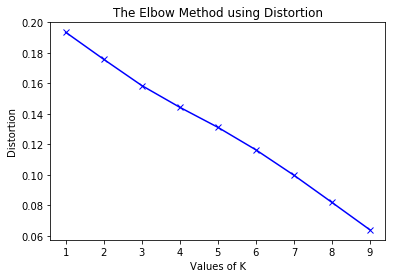

None

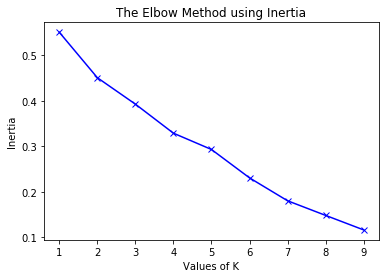

None

<Figure size 432x288 with 0 Axes>

In [104]:
district_grouped_clustering = district_grouped.drop('District', 1)
X = np.array(district_grouped_clustering)

dist, inert = k_elbow(X)

display(display_KE_Dist(dist))
plt.savefig('Elbow_Dist.svg', Bbox='tight')
display(display_KE_Inertia(inert))
plt.savefig('Elbow_Inert.svg', Bbox='tight')


After performing the K-Elbow on our data there is no great K-Elbow definition.
We will use cluster our districts into **4** as this is the most consistant elbow when we have calculated on numerous occasions.

In [67]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(district_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 0, 3, 2, 2, 0, 2])

In [68]:
# add clustering labels
try:
    df_polygon.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    df_polygon.drop(columns=['Cluster Labels'], inplace=True)
    df_polygon.insert(0, 'Cluster Labels', kmeans.labels_)

In [69]:
# Initiate a map
cambridge_KM_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

bins = 4

columns = ['District','Cluster Labels']
legend = 'K-Means Clustering'

# Add Choropleth, Circle Markers, Text Labels
add_choropleth(cambridge_KM_map,cambridge_geo,df_polygon,columns,bins,legend,'BuPu')
add_text_labels(cambridge_KM_map,df_polygon)

# Add layer control on the map
folium.LayerControl().add_to(cambridge_KM_map)
    
display(cambridge_KM_map)

** Choropleth Added
** Text Added


In [70]:
# create map
map_clusters = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

# set color scheme for the clusters
rainbow = ['#00aaff','#4c00ff','#ea00ff','#ff0080','#ff0000']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_polygon['Lat'], df_polygon['Lon'], df_polygon['District'], df_polygon['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    tooltip = 'Name: {},<br>Cluster: {}'.format(str(poi),str(cluster))
    folium.Circle(
        [lat, lon],
        radius=700,
        popup=label,
        tooltip=tooltip,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
add_text_labels(map_clusters,df_polygon)
display(map_clusters)

** Text Added


#### Cluster Anaylsis

We suggested earlier that the restaurant would be suited in an area similar to **Petersfield, Romsey, Market or Abbey** due to them having a Latin American restaurant. Looking at the clusters the following districts will be the ones that we choose based on their similarity to districts with Latin American food.

* Kings Hedges
* Market
* Petersfield
* Trumpington
* West Chesterton
    
These areas have similar venues, we got this cluster using our dataframe with all venues included.

### Correlation between Restaurants and Entertainment venues?

* Create a groupby dataframe for restaurants and another for entertainment.
* Display a horizontal barchart showing both values for each district.

In [71]:
df_ent_group = df_total_entertain.groupby('District').count()
df_ent_group.reset_index(inplace=True)
df_rest_group = df_total_restaurants.groupby('District').count()
df_rest_group.reset_index(inplace=True)

In [72]:
ent_mean = round(df_ent_group['Venue'].mean(),2)
ent_min = round(df_ent_group['Venue'].min(),2)
ent_max = round(df_ent_group['Venue'].max(),2)
ent_med = int(df_ent_group['Venue'].median())

rest_mean = round(df_rest_group['Venue'].mean(),2)
rest_min = round(df_rest_group['Venue'].min(),2)
rest_max = round(df_rest_group['Venue'].max(),2)
rest_med = int(df_rest_group['Venue'].median())

print('----- Entertainment -----')
print('Mean: ',ent_mean)
print('Min : ',ent_min)
print('Max : ',ent_max)
print('Med : ',ent_med)
print()
print('----- Restaurant -----')
print('Mean: ',rest_mean)
print('Min : ',rest_min)
print('Max : ',rest_max)
print('Med : ',rest_med)

----- Entertainment -----
Mean:  10.93
Min :  2
Max :  40
Med :  8

----- Restaurant -----
Mean:  13.0
Min :  3
Max :  53
Med :  10


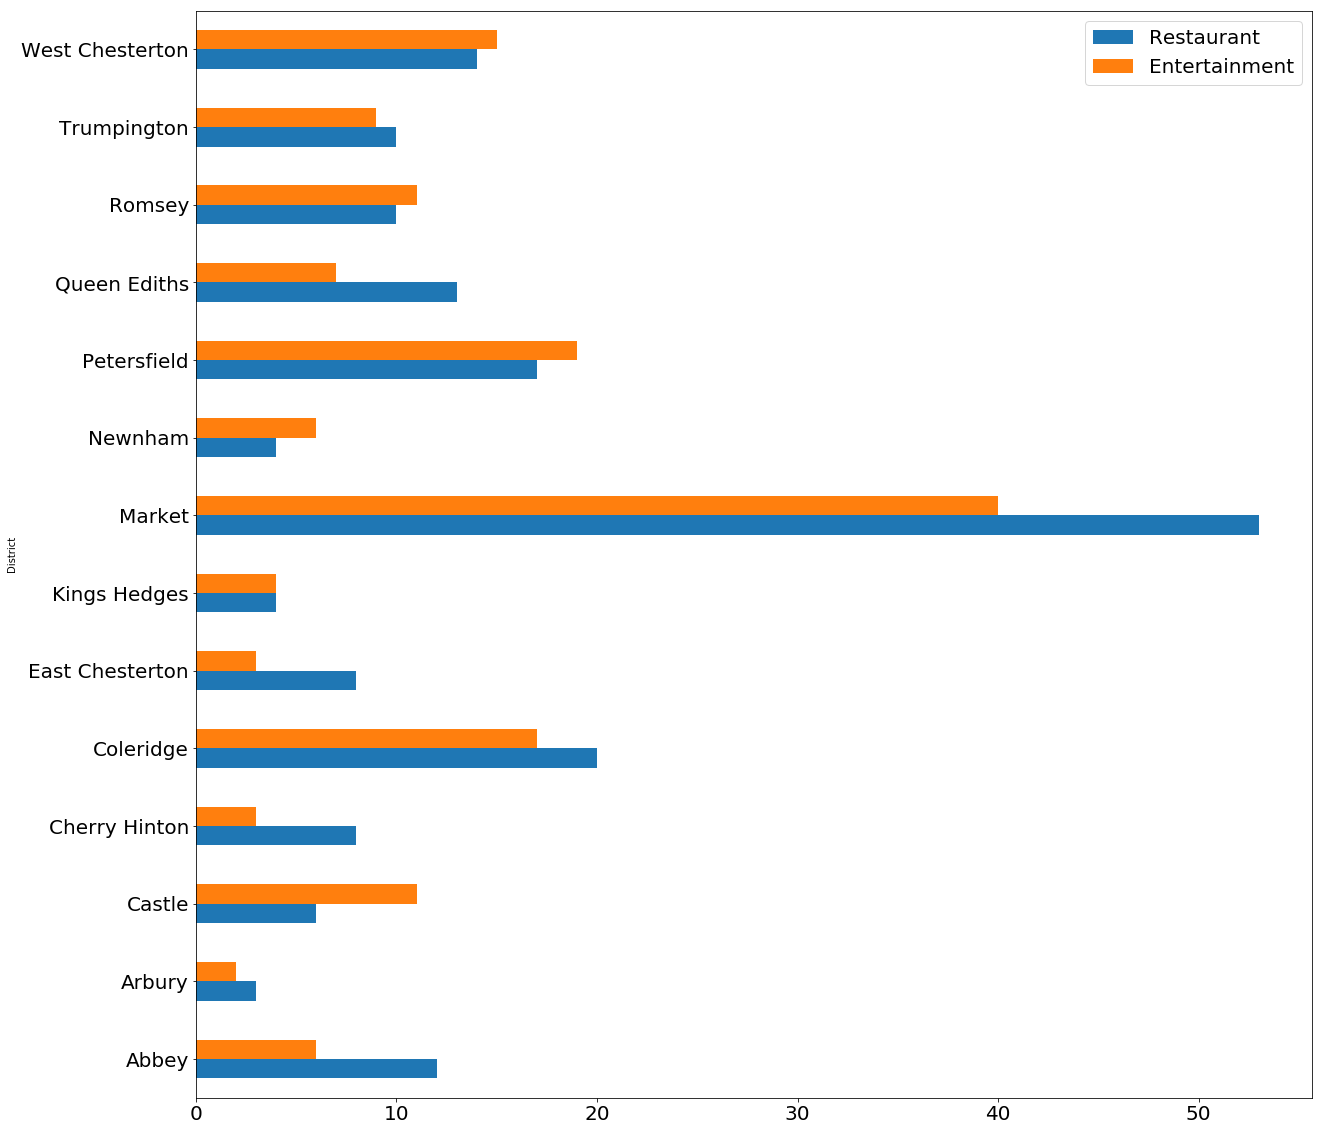

In [73]:
rest = np.array(df_rest_group['Venue'])
ent = np.array(df_ent_group['Venue'])
index = df_rest_group['District']

# Create horizontal barchart
df = pd.DataFrame({'Restaurant': rest,'Entertainment': ent}, index=index)
ax = df.plot.barh(figsize=(20,20))
ax.legend(loc=1, prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('District_Rest_Ent.svg', Bbox='tight')

There is a clear correlation between entertainment venues and restaurants.

#### Create a scatter plot to show the correlation and Linear Regression

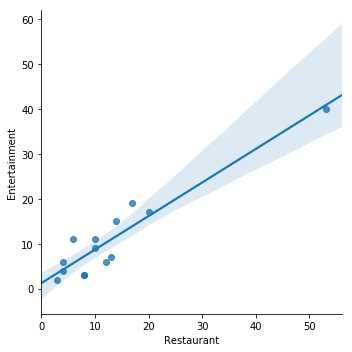

In [74]:
df_scatter = pd.merge(left=df_rest_group, right=df_ent_group, left_on='District', right_on='District')
df_scatter.drop(columns=['Venue Latitude_x','Venue Longitude_x','Venue Category_x','Venue Latitude_y','Venue Longitude_y','Venue Category_y'], inplace=True)
df_scatter.columns = ['District','Restaurant','Entertainment']

sns.lmplot(x="Restaurant", y="Entertainment", data=df_scatter)
plt.savefig('District_Rest_Ent_Scatter.svg', Bbox='tight')

From this scatter plot we can say with some certainty that there is a correlation between Entertainment and Restaurants.
We are missing a lot of data in the middle, as there is one district which exceeds all overs in Entertainment and Restaurants.
Due to the lack of data the 95% confidence interval mapped with the regression line becomes a lot larger towards greater frequency.

### Cluster DBSCAN Scatter Plot - Using Latitude & Longitude

Before we cluster with DBSCAN, let us find the **top 5** districts for entertainment within **cluster 2**

In [75]:
filter = df_polygon["Cluster Labels"]==2

df_cl = df_polygon.where(filter, inplace = False) 
df_cl.dropna(inplace=True)

d_arr = np.array(df_cl['District'])

df_cl_en = df_total_entertain['District'].isin(d_arr)

df_total_entertain['Top5'] = df_cl_en
df_total_entertain

filter = df_total_entertain['Top5']==True
df_en_top5 = df_total_entertain.where(filter, inplace=False)

df_en_top5.dropna(inplace=True)

Show Top 5

In [76]:
df_en_grp = df_en_top5.groupby('District').sum()
df_en_grp.sort_values("Top5", inplace=True, ascending=False)
df_en_grp

,Venue Latitude,Venue Longitude,Top5
District,,,
Market,2088.227817,4.891587,40.0
Petersfield,991.812126,2.589772,19.0
West Chesterton,783.259284,1.948558,15.0
Trumpington,469.697268,1.075653,9.0
Kings Hedges,208.913988,0.534775,4.0


From this chart, we can see the the **top 5** districts for entertainment in **Cluster 2** are:

1. Market
1. Petersfield
1. West Chesterton
1. Trumpington
1. Kings Hedges

**These are the 5 districts that we will use going forward.**

Firstly we will use a scatter plot to find the density of entertainment venues according to Latitude and Longitude.
This will help us to find the areas with the most venues. To display the clusters we will use the DBSCAN method.

Using a scatter plot we will show the density clusters of districts that are simiar to other districts with Latin American restaurants. We got this information from the K-Means clustering used to assign Districts into similar clusters using the restaurants and entertainment venues. Then we took the top 5, listed above.

#### -- FUNCTION -- Create Scatter Plot Cluster

In [77]:
def create_scatter_cluster(x,y,title,x_label,y_label,cl,cm):
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=cl, cmap=cm)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linewidth=0.5, alpha=0.5)
    plt.show()

#### -- FUNCTION -- DBSCAN District

In [78]:
def DBSCAN_DISTRICT(dis,eps):
    # get the Latitude and Longitude
    df = df_total_entertain[df_total_entertain['District'] == dis]

    # Create arrays for Latitude and Longitude
    ds_y = np.array(df['Venue Latitude'])
    ds_x = np.array(df['Venue Longitude'])
    
    # Combine both arrays into one stacked array.
    ds_X = np.stack((ds_x,ds_y), axis=1)
    
    # Normalise the co-ordinates
    ds_scaler = StandardScaler()
    ds_X_scaled = ds_scaler.fit_transform(ds_X)
    
    # Cluster using DBSCAN
    ds_clustering = DBSCAN(eps=eps, min_samples=3)
    ds_clusters = ds_clustering.fit_predict(ds_X_scaled)
    
    # Show plot of Market and DBSCAN
    create_scatter_cluster(ds_X[:,0],ds_X[:,1],'DBSCAN - {}'.format(dis),'Longitude','Latitude',ds_clusters,'Wistia')
    
    
    df['Scatter'] = ds_clusters
    print('Count: ',df.groupby('Scatter').count())
    
    # get the top cluster
    df_sort = df.groupby('Scatter').count()
    df_sort.sort_values('Top5',inplace=True,ascending=False)
    df_sort.reset_index(inplace=True)
    
    print('District Count: ',df_sort.iloc[0,1])
    
    # get dataframe with only venues from this cluster
    df_ret = df[df['Scatter'] == df_sort.iloc[0,0]]
    
    # return centroid of cluster
    midpoint_lat = df_ret['Venue Latitude'].mean()
    midpoint_lon = df_ret['Venue Longitude'].mean()
    ret_ctd = (midpoint_lat,midpoint_lon)
    
    return df_ret, ret_ctd

#### DBSCAN Plot - Market District

As this district contains the most entertainment venues I will reduce the EPS. For the other districts the EPS used will be *1*, but due to the density in this cluster we will use **0.5**.

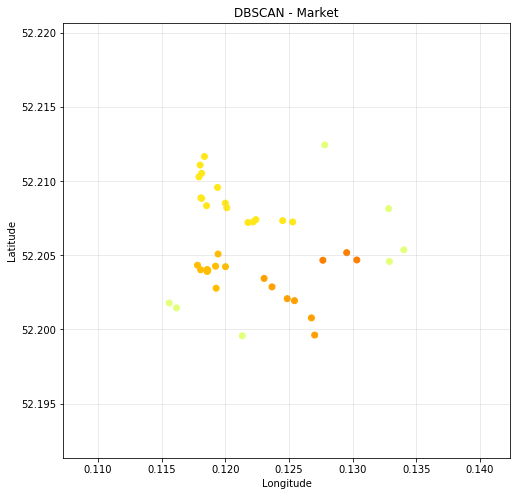

Count:           Venue  Venue Latitude  Venue Longitude  Venue Category  District  \
Scatter                                                                     
-1           7               7                7               7         7   
 0          15              15               15              15        15   
 1           9               9                9               9         9   
 2           6               6                6               6         6   
 3           3               3                3               3         3   

         Top5  
Scatter        
-1          7  
 0         15  
 1          9  
 2          6  
 3          3  
District Count:  15
Centroid:  (52.20883189212274, 0.1201961742335424)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

In [79]:
df_market, df_market_c = DBSCAN_DISTRICT('Market',0.5)
print('Centroid: ',df_market_c)
df_market
plt.savefig('DBSCAN_Market.svg', Bbox='tight')

We can see from the scatter plot above that the most populous area in **Market** is **Scatter 0**.<br>

#### DBSCAN Plot - Trumpington District

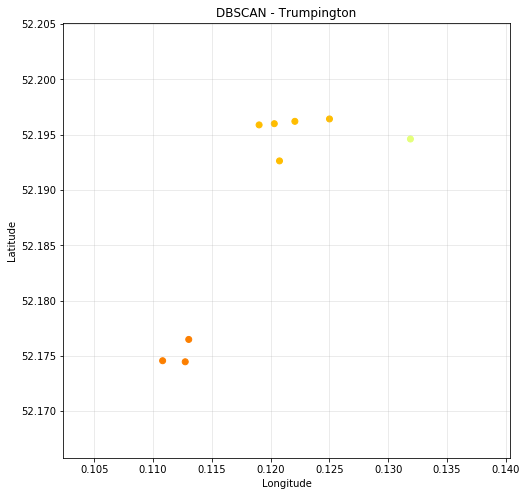

Count:           Venue  Venue Latitude  Venue Longitude  Venue Category  District  \
Scatter                                                                     
-1           1               1                1               1         1   
 0           5               5                5               5         5   
 1           3               3                3               3         3   

         Top5  
Scatter        
-1          1  
 0          5  
 1          3  
District Count:  5
Centroid:  (52.1954318642693, 0.12143359921649506)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

In [80]:
df_trumpington, df_trumpington_c = DBSCAN_DISTRICT('Trumpington',1)
print('Centroid: ',df_trumpington_c)
df_trumpington
plt.savefig('DBSCAN_Trumpington.svg', Bbox='tight')

We can see from the scatter plot above that the most populous area in **Trumpington** is **Scatter 0**.<br>

#### DBSCAN Plot - Petersfield District

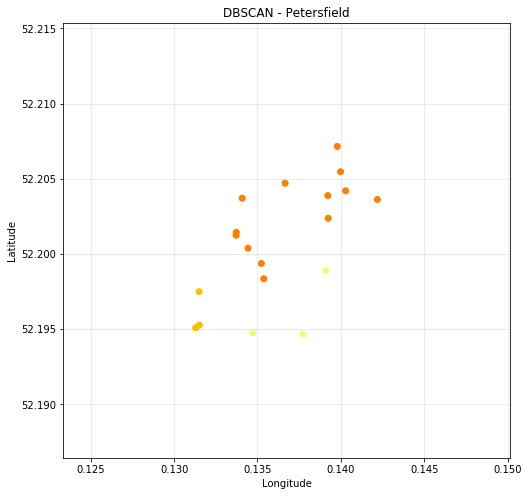

Count:           Venue  Venue Latitude  Venue Longitude  Venue Category  District  \
Scatter                                                                     
-1           3               3                3               3         3   
 0           3               3                3               3         3   
 1          13              13               13              13        13   

         Top5  
Scatter        
-1          3  
 0          3  
 1         13  
District Count:  13
Centroid:  (52.20276468019933, 0.1372260600253489)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

In [81]:
df_petersfield, df_petersfield_c = DBSCAN_DISTRICT('Petersfield',0.9)
print('Centroid: ',df_petersfield_c)
df_petersfield
plt.savefig('DBSCAN_Petersfield.svg', Bbox='tight')

We can see from the scatter plot above that the most populous area in **Petersfield** is **Scatter 1**.<br>

#### DBSCAN Plot - West Chesterton District

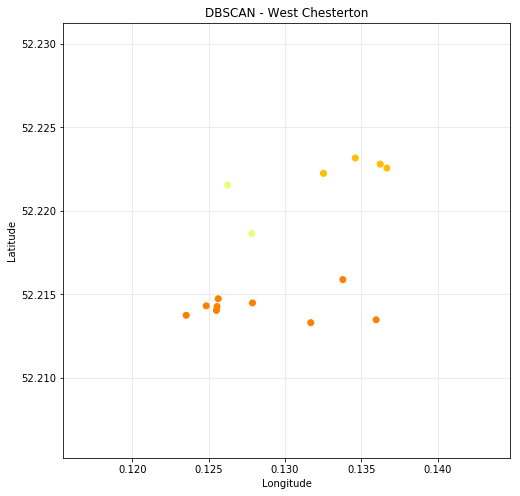

Count:           Venue  Venue Latitude  Venue Longitude  Venue Category  District  \
Scatter                                                                     
-1           2               2                2               2         2   
 0           4               4                4               4         4   
 1           9               9                9               9         9   

         Top5  
Scatter        
-1          2  
 0          4  
 1          9  
District Count:  9
Centroid:  (52.2142585406113, 0.12826901167870244)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

In [82]:
df_west, df_west_c = DBSCAN_DISTRICT('West Chesterton',1)
print('Centroid: ',df_west_c)
df_west
plt.savefig('DBSCAN_West.svg', Bbox='tight')

We can see from the scatter plot above that the most populous area in **West Chesterton** is **Scatter 1**.<br>

#### DBSCAN Plot - Kings Hedges District

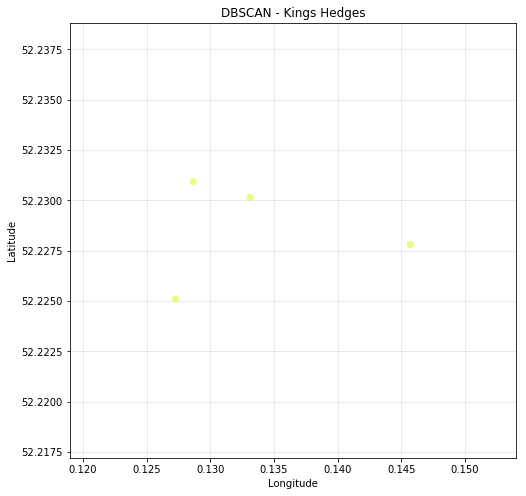

Count:           Venue  Venue Latitude  Venue Longitude  Venue Category  District  \
Scatter                                                                     
-1           4               4                4               4         4   

         Top5  
Scatter        
-1          4  
District Count:  4


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Centroid:  (52.228497014239274, 0.1336937099730806)


<Figure size 432x288 with 0 Axes>

In [83]:
df_kings, df_kings_c = DBSCAN_DISTRICT('Kings Hedges',1)
print('Centroid: ',df_kings_c)
df_kings
plt.savefig('DBSCAN_KingsHedges.svg', Bbox='tight')

We can see from the scatter plot above that the most populous area in **Kings Hedges** is **Scatter -1**.<br>In this DBSCAN there is only one cluster as the frequency of venues is low and the distances are not close in proximity.

### Get Suitable Locations


From the **K-Means Clustering** of districts, we selected the following locations for further anaylsis:

1. Market
1. Petersfield
1. West Chesterton
1. Trumpington
1. Kings Hedges

<p>Then we found the densest cluster of entertainment venues within these districts.
Now, using these clusters we aim to find a suitable location within each of these 5 districts to place the new restaurant.</p>
<p>When we performed the DBSCAN clustering we also made a dataframe for each of the five districts containing the venues from the densest cluster. In this function we also took the mean of latitude and longitude to get the midpoint of the cluster. As the distance are so close together, this is fine. If we were to perform this with geographically distant points due to the curvature of the earth, the midpoint would be inacurate.

#### -- FUNCTION -- Calculate Distance from Lat, Lng in Metres

In [84]:
def calculate_latlng_dist(lat1,lng1,lat2,lng2):
    
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lng1 = radians(lng1)
    lat2 = radians(lat2)
    lng2 = radians(lng2)
    
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlng / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

#### -- FUNCTION -- Calculate the angle between two Lat, Lng points

In [85]:
def bearing_coordinate(lat1,lon1,lat2,lon2):
    
    brng = bearing(lat1,lon1,lat2,lon2)
    return brng

In [86]:
# bearing_coordinate(52.197636,0.144912,52.209328,0.144877)

#### -- FUNCTION -- Calculate distance from Lat, Lng point using bearing and distance

In [87]:
def distanceUsingBearing(b,d,lat1,lon1):
    origin = geopy.Point(lat1, lon1)
    destination = geodesic(kilometers=d).destination(origin, b)

    return destination.latitude, destination.longitude

#### -- FUNCTION -- Create Final Map with markers

In [88]:
def create_final_map(d,df,cn,zm):

    # get lat and lon
    map_lat = df_polygon.loc[df_polygon['District'] == d,'Lat'].iloc[0]
    map_lon = df_polygon.loc[df_polygon['District'] == d,'Lon'].iloc[0]
    
    # Initiate a map
    m = folium.Map(location=[map_lat, map_lon], zoom_start=zm)
    
    # radius
    c_r = 500
    
    folium.Marker([cn[0],cn[1]],tooltip='Ideal Address').add_to(m)
    add_circle(m,df_total_latin,c_r,'#ff7d7d')
    add_circle_markers(m,df,'Blue')
    add_markers(m,df_total_latin,'Latin American Restaurant','red')
    display(m)

### District Maps - Market, Petersfield, West Chesterton, Castle & Newnham

In these maps, we are shwoing:

* Latin American Restaurants with a **red** marker.
    * There is a **red** circle indicating a 500m radius from the restaurant.
    * Our recommended location cannot be situated within this radius.
* Entertainment venues from the most populous DBSCAN cluster within this district.
* **Blue** marker indicating the most suitable location

## Map of Market

In [89]:
create_final_map('Market',df_market,df_market_c,15)

** Circles Added
** Circle Markers Added
** Markers Added


As we can see, this location is within the **500m** radius of an existing **Latin American** restaurant.
Let's find out how far away it is, using the function we have created above.

In [90]:
for lat, lng in zip(df_total_latin['Venue Latitude'], df_total_latin['Venue Longitude']):
    print('Distance is: ',round(calculate_latlng_dist(lat,lng,
                                                      df_market_c[0],df_market_c[1]),2),'Km','Lat: ',lat,'Lng: ',lng)

Distance is:  2.1 Km Lat:  52.19763631707918 Lng:  0.14491176009346454
Distance is:  1.68 Km Lat:  52.20932828 Lng:  0.14487663
Distance is:  1.58 Km Lat:  52.208076 Lng:  0.14340329
Distance is:  0.25 Km Lat:  52.21022973296178 Lng:  0.1173092001522491
Distance is:  1.42 Km Lat:  52.200508 Lng:  0.135943


<p>The recommended point is 390m away from one of the restaurants.<br>
Let's extend the distance between the desired location and the Latin American restaurant.</p>
<p>First lets find the bearing from the latin restaurant to the proposed point.</p>

In [91]:
la_lat = 52.21022973296178
la_lng = 0.1173092001522491

dif_angle = bearing_coordinate(la_lat,la_lng,df_market_c[0],df_market_c[1])
print('Angle is: ',dif_angle,'°')

Angle is:  128.31313175877216 °


Now, lets use this angle (154.954°) to find 500m from the Latin American restaurant.

In [92]:
df_market_u_lat, df_market_u_lon = distanceUsingBearing((dif_angle),0.5,la_lat,la_lng)
print("Lat: ",df_market_u_lat,"Lng: ",df_market_u_lon)

Lat:  52.20744379518874 Lng:  0.12304817787675461


Finally, let's check the new latitude and longitude on the map.

In [93]:
df_market_c = (df_market_u_lat,df_market_u_lon)
create_final_map('Market',df_market,df_market_c,15)

** Circles Added
** Circle Markers Added
** Markers Added


## Map of Trumpington

In [94]:
create_final_map('Trumpington',df_trumpington,df_trumpington_c,13)

** Circles Added
** Circle Markers Added
** Markers Added


## Map of Petersfield

In [95]:
create_final_map('Petersfield',df_petersfield,df_petersfield_c,15)

** Circles Added
** Circle Markers Added
** Markers Added


As we can see, this location is within the **500m** radius of an existing **Latin American** restaurant.
Let's find out how far away it is, using the function we have created above.

In [96]:
for lat, lng in zip(df_total_latin['Venue Latitude'], df_total_latin['Venue Longitude']):
    print('Distance is: ',round(calculate_latlng_dist(lat,lng,
                                                      df_petersfield_c[0],df_petersfield_c[1]),2),'Km','Lat: ',lat,'Lng: ',lng)

Distance is:  0.77 Km Lat:  52.19763631707918 Lng:  0.14491176009346454
Distance is:  0.9 Km Lat:  52.20932828 Lng:  0.14487663
Distance is:  0.73 Km Lat:  52.208076 Lng:  0.14340329
Distance is:  1.59 Km Lat:  52.21022973296178 Lng:  0.1173092001522491
Distance is:  0.27 Km Lat:  52.200508 Lng:  0.135943


<p>The recommended point is 300m away from one of the restaurants.<br>
Let's extend the distance between the desired location and the Latin American restaurant.</p>
<p>First lets find the bearing from the latin restaurant to the proposed point.</p>

In [97]:
la_lat = 52.200508
la_lng = 0.135943

dif_angle = bearing_coordinate(la_lat,la_lng,df_petersfield_c[0],df_petersfield_c[1])
print('Angle is: ',dif_angle,'°')

Angle is:  19.21100409531713 °


Now, lets use this angle (208.0980°) to find 500m from the Latin American restaurant.

In [98]:
df_petersfield_u_lat, df_petersfield_u_lon = distanceUsingBearing((dif_angle),0.5,la_lat,la_lng)
print("Lat: ",df_petersfield_u_lat,"Lng: ",df_petersfield_u_lon)

Lat:  52.20475127108455 Lng:  0.1383495798378208


Finally, let's check the new latitude and longitude on the map.

In [99]:
df_petersfield_c = (df_petersfield_u_lat,df_petersfield_u_lon)
create_final_map('Petersfield',df_petersfield,df_petersfield_c,15)

** Circles Added
** Circle Markers Added
** Markers Added


## Map of West Chesterton

In [100]:
create_final_map('West Chesterton',df_west,df_west_c,15)

** Circles Added
** Circle Markers Added
** Markers Added


## Map of Kings Hedges 

In [101]:
create_final_map('Kings Hedges',df_kings,df_kings_c,15)

** Circles Added
** Circle Markers Added
** Markers Added


#### Final Analysis

Now that we have the latitude and longitude points for the 5 districts, can we get an address from the lat and lng points?

### -- FUNCTION -- Return Address from Coordinates

In [102]:
from geopy.geocoders import Nominatim

def returnAddress(coord):
    
    locStr = str(coord[0]) + ',' + str(coord[1])
    geolocator = Nominatim(user_agent="My_app")
    location = geolocator.reverse(locStr)
    return location.address

Return the best address from:
* Market
* Petersfield
* West Chesterton
* Castle
* Newnham

In [103]:
add_mkt = returnAddress(df_market_c)
add_trm = returnAddress(df_trumpington_c)
add_pet = returnAddress(df_petersfield_c)
add_wes = returnAddress(df_west_c)
add_kng = returnAddress(df_kings_c)

print('--------------------------------')
print('|           Address            |')
print('--------------------------------')
print('Market Address: ')
print(add_mkt)
print('--------------------------------')
print('Trumpington Address: ')
print(add_trm)
print('--------------------------------')
print('Petersfield Address: ')
print(add_pet)
print('--------------------------------')
print('West Chesterton Address: ')
print(add_wes)
print('--------------------------------')
print('Kings Hedges Address: ')
print(add_kng)
print('--------------------------------')

--------------------------------
|           Address            |
--------------------------------
Market Address: 
Malcolm Place, King Street, Petersfield, Cambridge, Cambridgeshire, East of England, England, CB1 1LS, United Kingdom
--------------------------------
Trumpington Address: 
The Leys School, Bateman Street, Newtown, Cambridge, Cambridgeshire, East of England, England, CB2 7AD, United Kingdom
--------------------------------
Petersfield Address: 
6, Edward Street, Petersfield, Cambridge, Cambridgeshire, East of England, England, CB1 2LS, United Kingdom
--------------------------------
West Chesterton Address: 
3, Ferry Path, Petersfield, Cambridge, Cambridgeshire, East of England, England, CB4 1HB, United Kingdom
--------------------------------
Kings Hedges Address: 
147, Campkin Road, Chesterton, Cambridge, Cambridgeshire, East of England, England, CB4 2NP, United Kingdom
--------------------------------


[Back to Contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>5. Results</h2><a name="results"></a>
</div>

These are the results that we have taken from our analysis. At the start of the analysis section we set out to show the following:
1. **Does Cambridge follow the UK in terms of overall favourite restaurant types?**

<p>From examining the results that we achieved we can see that in general Cambridge does fit with the overall UK top restaurant list.</p>

<p>We noticed that pubs were not included in the **food** category, so we had to combine restaurants and entertainment dataframes to include pubs in the tally.</p>

<p>Once we included entertainment our sample data looked like the following, only including categories listed in the top 5 report:</p>

1. Pub/Gastropub (65)
1. Chinese (15)
1. Indian (10)
1. Pizza/Italian (9)

<p>This is a close correlation to the UK top 5 that we have found:</p>

1. Pub Food
2. English
3. Chinese
4. Indian
5. Italian


2. **Is there a correlation between the frequency of restaurant and entertainment venues?**

<p>The information gained from our sample data shows that there is a correlation between restaurant and entertainment venue frequency. Using our horizontal bar chart we can show that there is in the majority of instances more restaurants than entertainment venues, with a couple of outliers.</p>

<p>Using a scatter plot we were able to plot a linear regression. To create a more accurate regression line there would need to be more diversity in the frequencies. Currently there is a big interval between the most populous district and the second most populous district.</p>

3. **Cluster our districts to find which distrcits are similar.**

<p>In this section we used K-Means to make clusters to show similarities within Districts. For this we used a DataFrame which uses all venue type frequencies listed for all 156 unique categories.</p>
<p>To make sure that we optimised our K-Means cluster we created a K-Elbow diagram for Distortion and Inertia. This model did not really show us a K-Elbow with a defined elbow, but from the diagram we decided to use a K number of **4**.

<p>The resulting clusters were as follows:</p>

* **Cluster 0**
    * Arbury
    * Castle
    * Cherry Hinton
    * Coleridge
    * Newnham
    * Queen Ediths
    * Romsey

* **Cluster 1**
    * Abbey

* **Cluster 2**
    * Kings Hedges
    * Market
    * Petersfield
    * Trumpington
    * West Chesterton

* **Cluster 3**
    * East Chesterton
    
<p>As the majority of current Latin American restaurants are located in **Cluster 2** it was selected to research further.<br>One of the criteria was to find an area with a high density of entertainment, so we used the top 5 districts for entertainment frequency. In this cluster, we only had 5 available districts, the final selected districts were:</p>

* Kings Hedges
* Market
* Petersfield
* Trumpington
* West Chesterton
 

4. **Using our best match cluster can we then cluster the entertainment venues within the chosen districts to find the most populous district?**

<p>As we want our venue to be located near a populous area for entertainment venues we can try to find the most suitable location</p>
<p>Now that we have the results from the clustering narrowed our search to 5 districts. Using DBSCAN to create a scatter plot with latitude and longitude points for the entertainment venues within the districts we created a cluster of entertainment venues.</p>
<p>We took the cluster information and used it to create a list of the venues within the most populous cluster of venues. This information will be used to calculate the ideal location within the districts.</p>

5. **Get the ideal location within the most populous cluster within our chosen districts, to find an address.**

<p>In the last stage we took the mean of all of the coordinates from our list of entertainment venues within the prefered cluster and calculated the mean coordinate. With this mean coordinate for our three chosen districts we got the following addressess:</p>
* **Market**
    * Malcolm Place,<br>King Street,<br>Petersfield,<br>Cambridge.<br>CB1 1LS
* **Trumpington**
    * The Leys School,<br>Bateman Street,<br>Newtown,<br>Cambridge.<br>CB2 7AD
* **Petersfield**
    * 6, Edward Street,<br>Petersfield,<br>Cambridge.<br>CB1 2LS
* **West Chesterton**
    * 3, Ferry Path,<br>Petersfield,<br>Cambridge.<br>CB4 1HB
* **Kings Hedges**
    * 147, Campkin Road,<br>Chesterton,<br>Cambridge.<br>CB4 2NP
      
These locations can be used by the stakeholder to inform the letting agent of the ideal location that they would like to find a restaurant.

[Back to contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>6. Discussion</h2><a name="discussion"></a>
</div>

From the results achieved it can be seen that there are other factors we could use to find a more suitable district, if we feel that our research was not details enough.

For instance, as the comparison between the UK top 5 and Cambridge top 5 is very similar we could cluster more neighbourhoods from other citys to get more accurate clusters.

Cambridge is a fairly small city as we can see from the frequency of restaurants. Perhaps this research could be calculated using a larger city, for instance London, where we could increase the sample size radius and then using our clustering model we could use it on Cambridge.

Another approach could be to take the restaurants and entertainments coordinates and perform a DBSCAN to find the clusters with the densest of both items to make our search regions, rather than using districts. As the stakeholder wants to find an area with a high density of entertainment venues we can assume, from our correlation information, that the area will also be dense with restaurants too.

Another option would be to take the ratings of the entertainment venues within Cambridge and only select venues which are above a certain rating. This would mean that we could ensure that our chosen locations are within a cluster of top rated venues.

Lastly, we could look at the mean lease price for retail outlets within these districts so that the stakeholder can see the financial implications too.

[Back to contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>7. Conclusion</h2><a name="conclusion"></a>
</div>

Our research goal was to find suitable districts for the stakeholder's new restaurant, and to locate and area within the district which would be most suitable, and do not have a Latin American restaurant within 500m.

From our results we can see the following:

- Cambridge follows the UK in terms of the most popular restaurant types. This could help us with further research if required.
- There is a clear correlation between the frequency of restaurant and entertainment venues, so if the stakeholder wants a high density of entertainment venues they will have more competition from other restaurants.
- Of the addressess that we retrieved from our final analysis, the most suitable appears to be in **Market** with the highest cluster of entertainment venues (15) situated in close proximity. The **Market** area also has a high density of restaurants, and we can make an assumption that due to the densities of both restaurant and entertainment venues the lease price in the area will be the highest.

**Market** with an entertainment total of **40** and a restaurant total of **53** clearly shows that **Market** is the most populous in both aspects having the **max** in both charts.


* **Entertainment**
    * Mean:  10.93
    * Min :  2
    * Max :  40
    * Med :  8

* **Restaurant**
    * Mean:  13
    * Min :  3
    * Max :  53
    * Med :  10

[Back to contents](#contents)

> <small>Written by - Alex Lynn - © 2020</small>